# Neural networks - Single neuron as Binary Classifier

_Originally Jarvist Moore Frost - 10th November 2021_

<hr style="border:2px solid gray">

# Index: <a id='index'></a>
1. [Setting up our Data](#setup)
1. [Section 2 Title](#section-2)
1. [Appendix](#appendix)
    1. [Appendix Section A](#sec_A)

In [7]:
import sklearn, sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
np.random.seed(2) # This seed seems to get a nice gently overlapping dataset
n_samples=200

# Toy dataset with sklearn
X_circ, Y_circ = sklearn.datasets.make_gaussian_quantiles(mean=None, 
    cov=1.2, n_samples=n_samples, n_features=2, n_classes=2, 
    shuffle=True, random_state=None)

X_linear, Y_linear = sklearn.datasets.make_classification(n_features=2, n_redundant=0, n_samples=n_samples,
    n_informative=2, random_state=None, n_clusters_per_class=1)

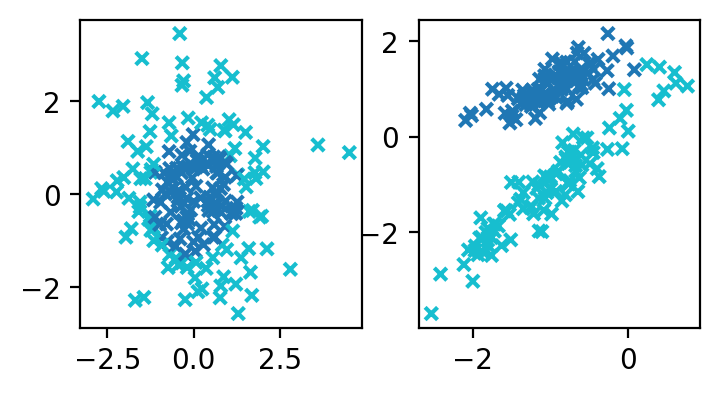

In [11]:
plt.rcParams['figure.figsize'] = [4,2] # 3x3 inch is good for a laptop screen; 5x5 for external monitor
plt.rcParams['figure.dpi'] = 200 

colors = sns.color_palette("tab10", as_cmap=True)

plt.subplot(121)
plt.scatter(X_circ[:,0],X_circ[:,1], c = Y_circ, s=20, marker = 'x', cmap = colors)
plt.subplot(122)
plt.scatter(X_linear[:,0],X_linear[:,1], c = Y_linear, s=20, marker = 'x', cmap = colors)
plt.show()

<hr style="border:2px solid gray">
<div style="background-color:#C2F5DD">

## Let's build an activation function

In [6]:
def sigmoid(v):
    return(1 / (1+np.exp(-v)))

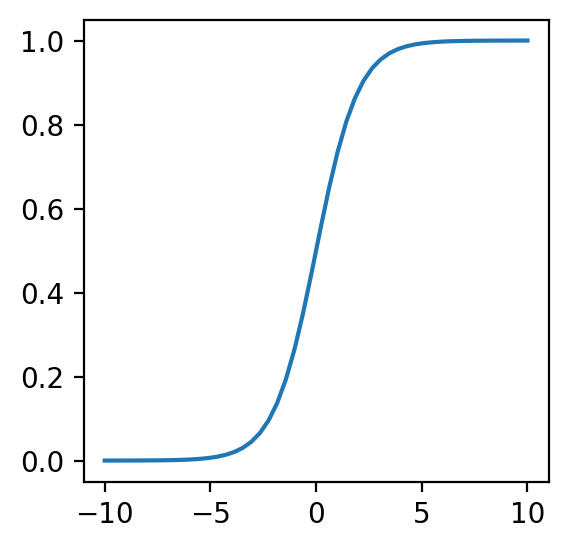

In [7]:
# plot your Sigmoid function 
x=np.linspace(-10,10)
plt.plot(x,sigmoid(x))

In [8]:
assert sigmoid(0.0) == 0.5 # zero of sigmoid should be 0.5
assert sigmoid(10.0) - 0.9999 < 0.0005
assert sigmoid(-10.0) < 0.0005
# Does this run? Your sigmoid is hopefully OK!

<hr style="border:2px solid gray">
<div style="background-color:#C2F5DD">

## Build a neuron function

In [9]:
def neuron(X, w=[0.0,0.0]):
    a=np.matmul(X,w) # activations
    y=sigmoid(a)     # non-linearity
    return y

In [10]:
assert neuron([0.0], w=[1.0]) == 0.5 # one weight of 1.0 = an neuron that is the sigmoid function
assert neuron([0.5,0.5], w=[0.0,0.0])==0.5

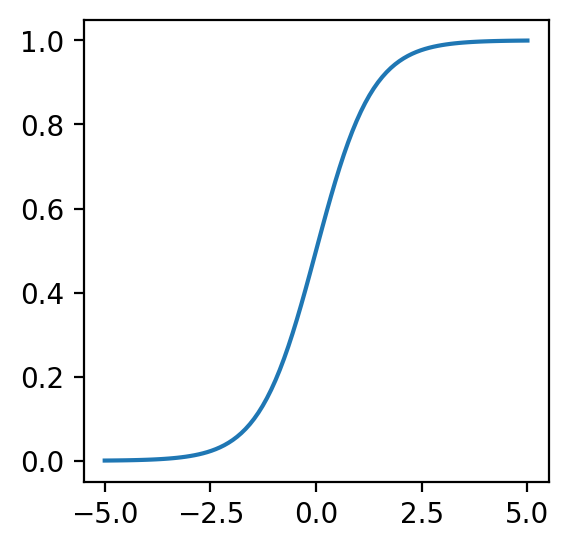

In [11]:
# Let's plot the neuron
Xrange=np.linspace(-5,5,100)

plt.plot(Xrange,neuron(np.transpose([Xrange]),w=[1.5])) # edit the weight to see what happens!

<hr style="border:2px solid gray">
<div style="background-color:#C2F5DD">

## Let's put it all together in a training function

In [12]:
eta=0.1 # learning rate
alpha=0.0 # decay parameter

In [13]:
# weight matrix should look something like...
w=np.array([0.5,0.5])

$$y=\sigma ( X * w ) $$

In [14]:
# activations are just X*w (matrix notation)
a=np.matmul(X,w)
np.shape(a) # it's always useful to keep track of the shape of your 'tensors' as you progress through the code

(200,)

In [15]:
# These then need to be transformed via our non-linear function, in this case our sigmoid
y=sigmoid(a)

$$ e=Y-y $$

In [16]:
# Then we need to define an error - here it's just the mismatch (L1 norm) between prediction and observation
e=Y-y

$$ gradient = - X'*e $$

In [17]:
# The gradient due to this loss, is -X'*e (matrix notation, X' being X transpose)
gradient= - np.matmul(np.transpose(X),e)
gradient

array([ 38.50062135, 149.25376806])

In [18]:
# Finally we should update our weights
w=w-eta*(gradient+alpha*w)

<hr style="border:2px solid gray">
<div style="background-color:#C2F5DD">

## Now let's pull it all together, and have a function that does one training step

In [19]:
def train(X,Y,w, eta=0.02, alpha=0.0):
    a=np.matmul(X,w)
    y=sigmoid(a)
    e=Y-y
    gradient= -np.matmul(np.transpose(X),e)
    w=w-eta*(gradient+alpha*w)
    loss=sum(abs(e)) # overall absolute loss
    return(w,loss)

<hr style="border:2px solid gray">

## Training loop

In [26]:
w=np.array([0.1, 0.1]) # initial neuron weights

weights=[]
loss=[]
for i in range(1,100): # run this many training steps
    w,e=train(X,Y,w, eta=0.02, alpha=0.5)   # train
    weights.append(w)  # note down the weights
    loss.append(e)     # note down the loss

<hr style="border:2px solid gray">

## Visualise what we've done

Text(0, 0.5, 'Loss')

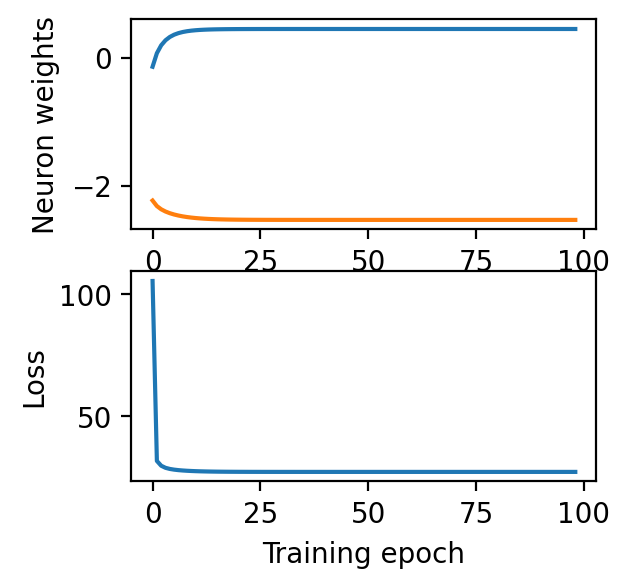

In [27]:
# Plot neuron weights, and loss on the same axis, versus training epoch
plt.figure(1)
plt.subplot(211)

plt.plot(weights)
plt.xlabel("Training epoch")
plt.ylabel("Neuron weights")

plt.subplot(212)

plt.plot(loss)
plt.xlabel("Training epoch")
plt.ylabel("Loss")

In [28]:
# Final loss - this is the thing to minimise!
loss[-1]

27.083190683425205

In [29]:
# make a grid of predictions, for plotting the decision boundary
N=100
Xgrid=np.meshgrid(np.linspace(-5, 5, N), np.linspace(-5, 5, N))
Xgrid2=np.array([np.ndarray.flatten(Xgrid[0]), np.ndarray.flatten(Xgrid[1])])
predict=neuron(np.transpose(Xgrid2),w) # re-using our neuron function from earlier
predict=predict.reshape( (N,N) )

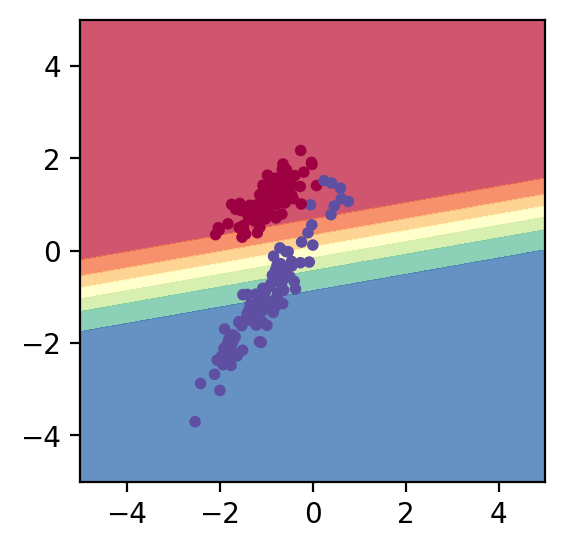

In [30]:
# filled contour of the decision boundary
plt.contourf(Xgrid[0], Xgrid[1] ,predict, cmap=plt.cm.Spectral, alpha=0.8)
# scatter plot of the training data
plt.scatter(X[:,0],X[:,1], c=Y, s=10, cmap=plt.cm.Spectral)

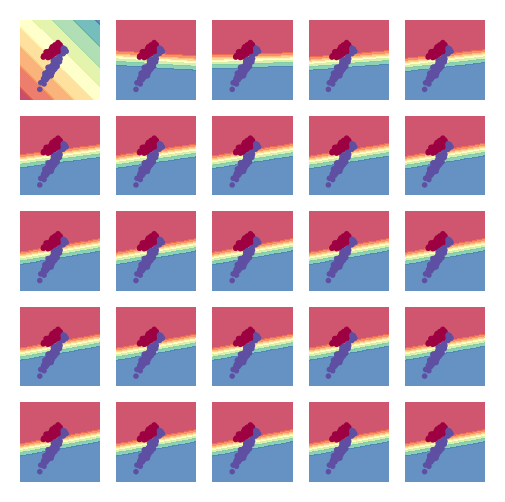

In [31]:
# This function visualises the neural decision boundary as you train
w=np.array([0.1, 0.1]) #initial neuron weights

for i in range(1,26):
    ax = plt.subplot(5, 5, i)
    plt.axis('off')
    
    
    N=25
    Xgrid=np.meshgrid(np.linspace(-5, 5, N), np.linspace(-5, 5, N))
    Xgrid2=np.array([np.ndarray.flatten(Xgrid[0]), np.ndarray.flatten(Xgrid[1])])
    predict=neuron(np.transpose(Xgrid2),w) # re-using our neuron function from earlier
    predict=predict.reshape( (N,N) )
    
    plt.contourf(Xgrid[0], Xgrid[1] ,predict, cmap=plt.cm.Spectral, alpha=0.8)
    # scatter plot of the training data
    plt.scatter(X[:,0],X[:,1], c=Y, s=1, cmap=plt.cm.Spectral)
    
    w,loss=train(X,Y,w)
